# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Diego Cornejo

### **Link de repositorio de GitHub:** `https://github.com/diegonachon/mds7202/tree/main/lab4`

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?

2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
    
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?

4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.

5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?

6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

    1. Corresponde a un motor unificado, diseñado para el procesamiento de datos a gran escala. Las principales ventajas que tiene sobre pandas se basan en su gestión de memoria, desempeño con grandes volumenes de datos y la capacidad de operaciones paralelas; ya que posee mayor velocidad, debido a la maximización de recursos que posee, la construcción de cálculos como DAGs, una estructura de datos RDD, es compatible con multiples lenguajes y es extensible, que se enfoca en el paralelismo para un procesamiento veloz.
    
    2. Un RDD crresponde a una colección distribuida e inmutable de elementos que peuden ser operados en paralelo. Entre sus principales caracteristicas se encuentran dependencias, que mantiene un registro de las transformaciones aplicadas a los datos de forma DAG, lo que permite a Spark reconstruirlos en caso de fallo; particiones, que como dice el nombre, divide los datos en aprticiones que permite las operaciones en paralelo; y cómputo de funciones, donde cada partición se procesa mediante una función definida. Su relación con los dataframes viene en que estos están construidos sobre los RDDs, proporcionando una interfaz más amigable y optimizada para el procesamiento de datos estructurados.
    
    3. Las transformaciones corresponden a operaciones que crean un nuevo dataset a partir de uno existente; mientras que las acciones son operaciones que desencadenan la ejecución de todas las transformaciones acumuladas. Algunos ejemplos de transformaciones son orderBy(), groupBy(), filter() y select(); mientras que de acciones son show(), take(), count() y collect(). Cuando se ejecuta una acción, se tiene que Spark optimiza el plan de ejecución de las transformaciones que deben ser ejecutadas si el resultado es necesario para una acción.
    
    4. La importancia del particionamiento es clave para la optimización del rendimiento, ya que propuebe el paralelismo. Esto es porque, al distribuir los datos en particiones, se facilita que los ejecutores procesen datos que se encuentren más próximos a ellos, reduciendo el ancho de banda necesario para la transferencia de datos; maximizando la eficiancia del procesamiento y minimizando el tiempo de ejecución.

    5. Spark driver es el encargado de instanciar la SparkSession, teniendo como principales funciones el comunicarse con el gesto del clúster para solicitar recursos y transformar las operaciones definidas en los DAGs. Por su parte, Spark Executor opera en cada nodo operativo dentro del clústor, comunicándose con el programa conductor; siendo el encargado de llevar a cabo las tareas asignadas en los nodos, por medio del procesamiento de datos y devolviendo los resultados al conductor.
    
    6. Catalyst Optimizer es una parte de Apache Spark que aprovecha características avanzadas del lenguaje de programación, para crear un optimizador de consultar extensible, teniendo como principales propósitos el poder agregar de manera fácil nuevas ´tenicas y funciones de optimización a Spark SQL; y permitir que desarrolladores externos amplien el optimizador, por ejemplo, agregando reglas específicas de fuentes de datos, soporte de nuevos tipos de datos, entre otros.

## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
# !pip install pyspark
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
# !pip install --upgrade plotly
# !pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

Cargue los datos usando **pyspark**

In [3]:
sparksession = SparkSession.builder.master("local").appName("Cargar archivo Parquet").getOrCreate()

df = sparksession.read.parquet("datos_lab_spark.parquet")

24/04/20 01:43:36 WARN Utils: Your hostname, diego-HP-Pavilion-Gaming-Laptop-15-cx0xxx resolves to a loopback address: 127.0.1.1; using 192.168.1.100 instead (on interface eno1)
24/04/20 01:43:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/20 01:43:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [4]:
#1. Utilice .printSchema() para revisar la estructura de los datos

df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [5]:
#2. Muestre las primeras 10 filas del dataset. Hint: utilice .show()

df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [6]:
#3. Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice .sample()

df.sample(fraction = 0.05, seed = 99).show(truncate = False, vertical = True)

-RECORD 0---------------------------------------------------------------------
 Transaction ID     | NULL                                                    
 Customer ID        | NULL                                                    
 Transaction Amount | 178.94                                                  
 Transaction Date   | 2020-05-15 00:00:00                                     
 Payment Method     | debit card                                              
 Product Category   | clothing                                                
 Quantity           | 4.0                                                     
 Customer Age       | 27.0                                                    
 Customer Location  | NULL                                                    
 Device Used        | mobile                                                  
 IP Address         | 211.46.251.245                                          
 Shipping Address   | 298 Taylor Canyon\nSouth Megan

In [7]:
#4. Revise los tipos de datos de cada columna con .dtypes() y responda la siguiente pregunta:
# ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?

df.dtypes

# Para efectos prácticos, la columna problemática sería quantity, debiendo ser integer para evitar cantidades
# decimales de productos; y Is An Alien, debiendo ser integer, entendiendose como una variable categorica.

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

In [8]:
#5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.

df = df.withColumn('Quantity', df['Quantity'].cast(IntegerType()))
df = df.withColumn('Is An Alien', df['Is An Alien'].cast(IntegerType()))
df

DataFrame[Transaction ID: string, Customer ID: string, Transaction Amount: double, Transaction Date: timestamp_ntz, Payment Method: string, Product Category: string, Quantity: int, Customer Age: double, Customer Location: string, Device Used: string, IP Address: string, Shipping Address: string, Billing Address: string, Is An Alien: int, Account Age Days: double, Transaction Hour: double]

In [9]:
# 6. Cuente la cantidad de datos nulos por variable. 
# Recuerde que Spark no posee un método que le permita calcular directamente los nulos.

from pyspark.sql.functions import col, sum, when

null_values = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]

df.agg(*null_values).show(truncate = False, vertical = True)

-RECORD 0--------------------
 Transaction ID     | 126886 
 Customer ID        | 126847 
 Transaction Amount | 126840 
 Transaction Date   | 126831 
 Payment Method     | 126877 
 Product Category   | 126814 
 Quantity           | 126966 
 Customer Age       | 126826 
 Customer Location  | 126781 
 Device Used        | 126911 
 IP Address         | 126929 
 Shipping Address   | 126734 
 Billing Address    | 126804 
 Is An Alien        | 126828 
 Account Age Days   | 126886 
 Transaction Hour   | 126953 



In [10]:
# 7. Elimine datos nulos.

df = df.na.drop()

In [11]:
#8. Elimine datos duplicados.

df = df.dropDuplicates()

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [12]:
#1. Agregar una columna llamada "Transaction bp" con el monto total de la transacción en bodoque pesos.

from pyspark.sql.functions import log10, abs

df = df.withColumn("Transaction bp", 
                      log10(48 + abs(df["Transaction Amount"])**36))

df.show(2, truncate = False, vertical = True)

-RECORD 0--------------------------------------------------------
 Transaction ID     | 530a4f63-7bda-41d9-b796-bd4a70a9bf76       
 Customer ID        | 6eb13ca7-4c3c-4563-a5e7-04f81ca29260       
 Transaction Amount | 117.07                                     
 Transaction Date   | 2023-07-24 00:00:00                        
 Payment Method     | credit card                                
 Product Category   | clothing                                   
 Quantity           | 1                                          
 Customer Age       | 43.0                                       
 Customer Location  | Fullerberg                                 
 Device Used        | tablet                                     
 IP Address         | 55.96.41.26                                
 Shipping Address   | 5962 Dodson Trafficway\nSaratown, MN 81404 
 Billing Address    | 5962 Dodson Trafficway\nSaratown, MN 81404 
 Is An Alien        | 0                                          
 Account A

In [13]:
#2. Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.

from pyspark.sql.functions import month

df = df.withColumn("Transaction Month", month("Transaction Date"))

df.show(2, truncate = False, vertical = True)

-RECORD 0--------------------------------------------------------
 Transaction ID     | 530a4f63-7bda-41d9-b796-bd4a70a9bf76       
 Customer ID        | 6eb13ca7-4c3c-4563-a5e7-04f81ca29260       
 Transaction Amount | 117.07                                     
 Transaction Date   | 2023-07-24 00:00:00                        
 Payment Method     | credit card                                
 Product Category   | clothing                                   
 Quantity           | 1                                          
 Customer Age       | 43.0                                       
 Customer Location  | Fullerberg                                 
 Device Used        | tablet                                     
 IP Address         | 55.96.41.26                                
 Shipping Address   | 5962 Dodson Trafficway\nSaratown, MN 81404 
 Billing Address    | 5962 Dodson Trafficway\nSaratown, MN 81404 
 Is An Alien        | 0                                          
 Account A

In [14]:
#3. Crear la variable Type of purchase según la catidad de unidades vendidas

from pyspark.sql.functions import when

df = df.withColumn("Type of purchase",
                   when(df["Quantity"]<= 5, "Compra minorista")
                   .otherwise("Compra mayorista"))

df.show(2, truncate = False, vertical = True)

-RECORD 0--------------------------------------------------------
 Transaction ID     | 530a4f63-7bda-41d9-b796-bd4a70a9bf76       
 Customer ID        | 6eb13ca7-4c3c-4563-a5e7-04f81ca29260       
 Transaction Amount | 117.07                                     
 Transaction Date   | 2023-07-24 00:00:00                        
 Payment Method     | credit card                                
 Product Category   | clothing                                   
 Quantity           | 1                                          
 Customer Age       | 43.0                                       
 Customer Location  | Fullerberg                                 
 Device Used        | tablet                                     
 IP Address         | 55.96.41.26                                
 Shipping Address   | 5962 Dodson Trafficway\nSaratown, MN 81404 
 Billing Address    | 5962 Dodson Trafficway\nSaratown, MN 81404 
 Is An Alien        | 0                                          
 Account A

In [15]:
#4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista. Utilice .filter().

df.filter((df['Type of purchase'] == 'Compra mayorista') &
          (df['Is An Alien'] == 0)).show(truncate = False, vertical = True)

(0 rows)



In [16]:
#5. Cuente la cantidad de compras realizadas por humanos y 
# la cantidad de compras realizadas por alienígenas. Utilice .groupby().

from pyspark.sql.functions import count

df.groupBy("Is An Alien").agg(count("*").alias("Cantidad de compras")).show()

+-----------+-------------------+
|Is An Alien|Cantidad de compras|
+-----------+-------------------+
|          1|                688|
|          0|              12700|
+-----------+-------------------+



In [17]:
#6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago,
# tanto para humanos como alienígenas. Utilice pivot()

df.groupBy("Payment Method").pivot('Is An Alien').mean("Transaction Amount").show()


+--------------+------------------+------------------+
|Payment Method|                 0|                 1|
+--------------+------------------+------------------+
|    debit card|215.21641883519246| 547.1965168539324|
| bank transfer|215.15149230285914| 547.6004624277457|
|        PayPal|215.12598584753957|469.51776470588214|
|   credit card| 206.3112232704407| 517.7530538922159|
+--------------+------------------+------------------+



### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

**Respuestas**

**1. Conversión del DataFrame a formato pandas**

In [18]:
import pandas as pd
df = df.toPandas()
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is An Alien,Account Age Days,Transaction Hour,Transaction bp,Transaction Month,Type of purchase
0,530a4f63-7bda-41d9-b796-bd4a70a9bf76,6eb13ca7-4c3c-4563-a5e7-04f81ca29260,117.07,2023-07-24,credit card,clothing,1,43.0,Fullerberg,tablet,55.96.41.26,"5962 Dodson Trafficway\nSaratown, MN 81404","5962 Dodson Trafficway\nSaratown, MN 81404",0,50.0,10.0,74.464042,7,Compra minorista
1,416dbe38-0a22-4198-824e-df8e91bb03b2,6913cd48-558e-488f-8eca-c042c5b0cb0b,835.13,2023-09-07,bank transfer,home & garden,4,28.0,East Mark,tablet,28.67.160.133,"668 John Lane\nNew Richardburgh, WY 18021","668 John Lane\nNew Richardburgh, WY 18021",0,24.0,22.0,105.183147,9,Compra minorista
2,3dc75b43-57b1-4150-9287-042acd9ab545,508b8f87-637e-47aa-89bb-7684530e26dc,146.71,2018-10-25,bank transfer,toys & games,2,43.0,Cortezchester,tablet,81.203.178.152,"3263 King Route\nEast Christopherport, NJ 73670","3263 King Route\nEast Christopherport, NJ 73670",0,234.0,2.0,77.992550,10,Compra minorista
3,a3217541-b6f1-4467-ad01-700d8afae4a8,a0d2baca-bdc9-43e2-8ad1-cc1998ab9b48,217.68,2020-05-04,credit card,clothing,2,30.0,Lake Todd,desktop,110.174.180.48,"31724 Joseph Ports\nEast Christopher, SC 48780","31724 Joseph Ports\nEast Christopher, SC 48780",0,179.0,19.0,84.161467,5,Compra minorista
4,99481a7d-3c74-492d-b8f2-36b18e478113,d8534365-f682-470e-b590-70640fb472a9,1008.77,2024-02-18,PayPal,electronics,3,33.0,Whitneymouth,desktop,95.93.23.67,"16455 Corey Expressway Apt. 119\nBoothchester,...","16455 Corey Expressway Apt. 119\nBoothchester,...",0,41.0,16.0,108.136518,2,Compra minorista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13383,e08b26c7-f4a3-4929-89e2-8b6696664bdd,a87b716c-b6f1-458c-ab59-408f7260f151,364.65,2021-11-09,bank transfer,health & beauty,1,36.0,South Amandashire,tablet,20.223.228.239,3791 Perez Village Apt. 779\nWest Cynthiaville...,USS Barnes\nFPO AP 09198,1,5.0,10.0,92.227544,11,Compra minorista
13384,f3e51a01-7f26-4301-955d-232d4fed032d,44c18cdf-8791-4ca1-aa8a-27299ef8234a,474.83,2021-04-30,PayPal,electronics,3,49.0,Flynnfurt,mobile,11.232.241.218,"7598 George Coves\nEast Christinachester, FM 0...","7598 George Coves\nEast Christinachester, FM 0...",0,5.0,17.0,96.355373,4,Compra minorista
13385,e150a382-a053-492c-b62d-5f95441761d6,44c66e27-9dcb-43d6-883c-a3411df29bc6,76.96,2022-07-22,debit card,clothing,1,47.0,North Laura,tablet,34.140.98.244,Unit 9694 Box 4455\nDPO AP 02105,Unit 9694 Box 4455\nDPO AP 02105,0,30.0,20.0,67.905542,7,Compra minorista
13386,3247ae2c-79c9-48fd-bdbd-8bb7fdebfffe,4af1cb31-268c-4728-883e-6ea78a9b3111,117.03,2020-03-02,credit card,clothing,2,40.0,Thomasberg,tablet,111.33.119.74,"8679 Wright Bridge Apt. 682\nWest Matthew, MS ...","8679 Wright Bridge Apt. 682\nWest Matthew, MS ...",0,118.0,18.0,74.458699,3,Compra minorista


**2. Visualización de Variables Categóricas**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

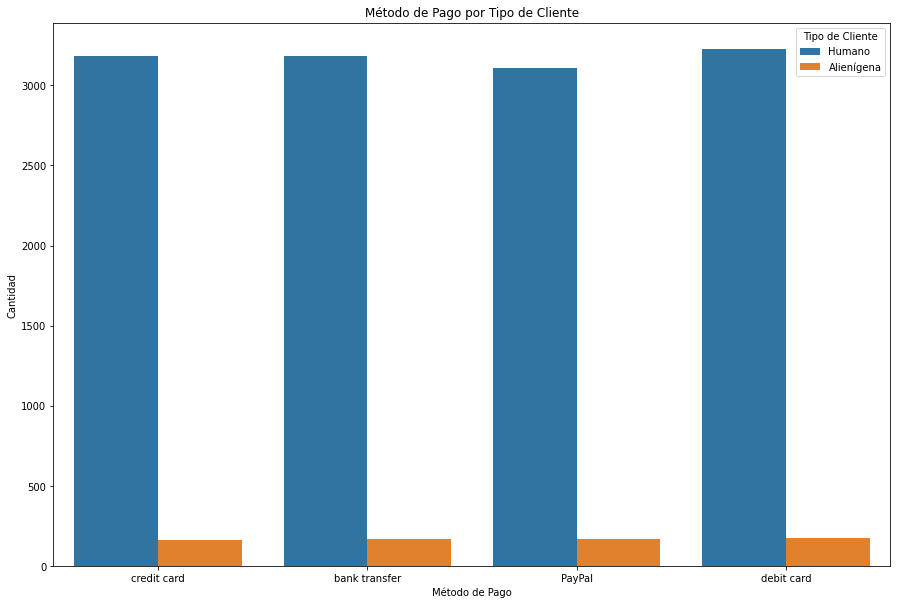

In [20]:
# Método de pago utilizado por Humanos y Aliens

plt.figure(figsize=(15, 10))
sns.countplot(data=df, x="Payment Method", hue="Is An Alien")
plt.title("Método de Pago por Tipo de Cliente")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad")
plt.legend(title="Tipo de Cliente", labels=["Humano", "Alienígena"])
plt.show()
plt.close()


# Se aprecia una diferencia significativa entre la cantidad de compras realizadas entre las dos
# clases, por método de pago. En los Aliens, se observa que hay un uso similar entre todos los
# métodos de pago, mientras que en los Humanos hay levemente mayor cantidad de credit card y debit
# card, siendo PayPal el menos utilizado.

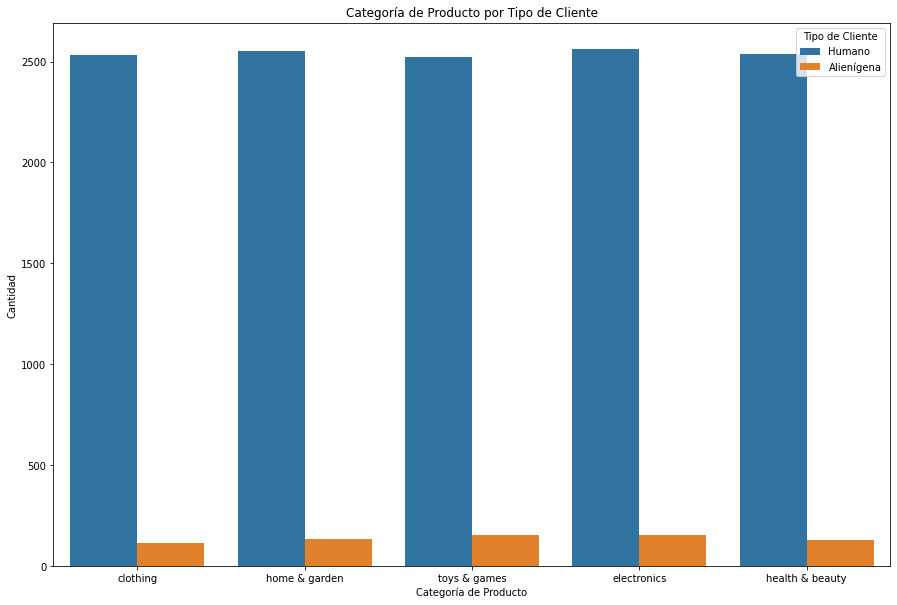

In [21]:
# Categoría de producto comprada por tipo de cliente

plt.figure(figsize=(15, 10))
sns.countplot(data=df, x="Product Category", hue="Is An Alien")
plt.title("Categoría de Producto por Tipo de Cliente")
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad")
plt.legend(title="Tipo de Cliente", labels=["Humano", "Alienígena"])
plt.show()
plt.close()

# Se observa que tanto en Humanos, como Aliens, es similar la cantidad de compras realizadas por 
# categoría de producto según el tipo de cliente. Por otro lado, en el caso de los Humanos, la 
# categoría con menor cantidad corresponde a toys & games; mientras que en el caso de los Aliens
# corresponde a clothing.

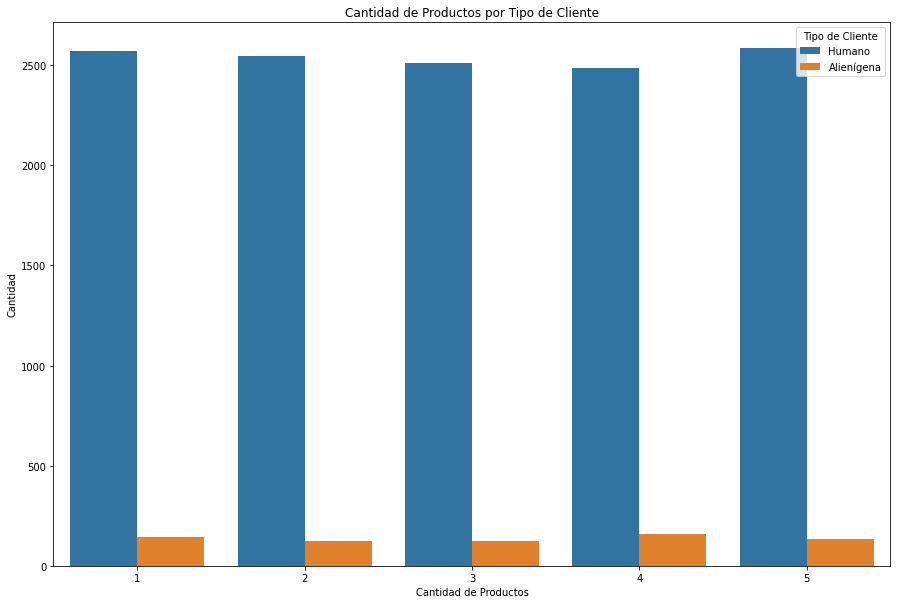

In [22]:
# Cantidad de productos comprados por Humanos y Aliens

plt.figure(figsize=(15, 10))
sns.countplot(data=df, x="Quantity", hue="Is An Alien")
plt.title("Cantidad de Productos por Tipo de Cliente")
plt.xlabel("Cantidad de Productos")
plt.ylabel("Cantidad")
plt.legend(title="Tipo de Cliente", labels=["Humano", "Alienígena"])
plt.show()
plt.close()

# Se observa que tanto en Humanos, como Aliens, es similar la cantidad de productos comprados
# según el tipo de cliente. Así mismo, se tiene que en los Humanos se suelen llevar más 
# comúnmente 1 o 5 productos, siendo 4 productos el menos frecuentes; mientraas que en los
# Aliens 2 y 5 son los menos frecuentes y 4 es el más frecuente.

**3. Visualización de Variables Numéricas**

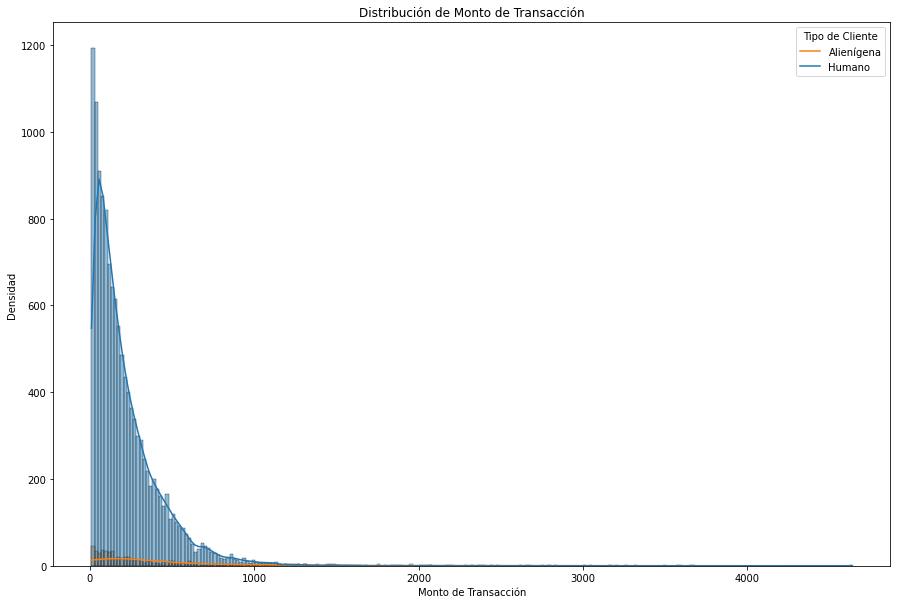

In [23]:
# Distribución de monto de la transacción realizada

plt.figure(figsize=(15, 10))
sns.histplot(df, x="Transaction Amount", hue="Is An Alien", kde=True)
plt.title("Distribución de Monto de Transacción")
plt.xlabel("Monto de Transacción")
plt.ylabel("Densidad")
plt.legend(title="Tipo de Cliente", labels=["Alienígena", "Humano"])
plt.show()
plt.close()

# En ambos tipos de clientes se tiene una distribución similar, con la diferencia de que en los humanos
# se exacerba el monto de las transacciones en valores menores, decreciendo exponencialmente; mientras
# que en los Aliens decrece de manera constante y más suavizada.

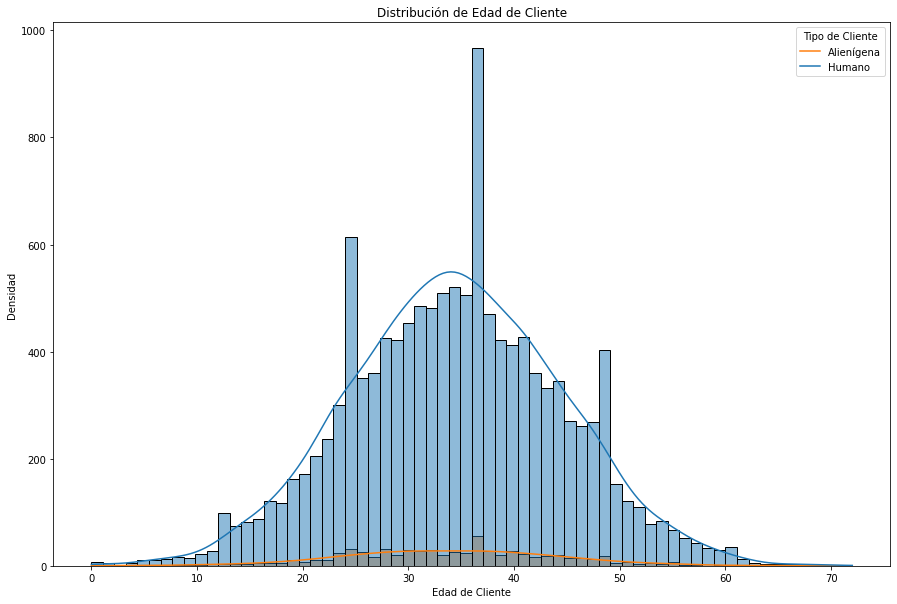

In [24]:
# Distribución de edad del cliente

plt.figure(figsize=(15, 10))
sns.histplot(df, x="Customer Age", hue="Is An Alien", kde=True)
plt.title("Distribución de Edad de Cliente")
plt.xlabel("Edad de Cliente")
plt.ylabel("Densidad")
plt.legend(title="Tipo de Cliente", labels=["Alienígena", "Humano"])
plt.show()
plt.close()

# Se observan distribuciones similares, con la presencia de segmentos más densos que otros
# de manera de outliers, como lo son de 26 a 27, 37 a 38 y 48 a 49 en los Humanos; mientras
# que en los Aliens la distribución es más constante. Ambas corresponden a distribuciones normales.

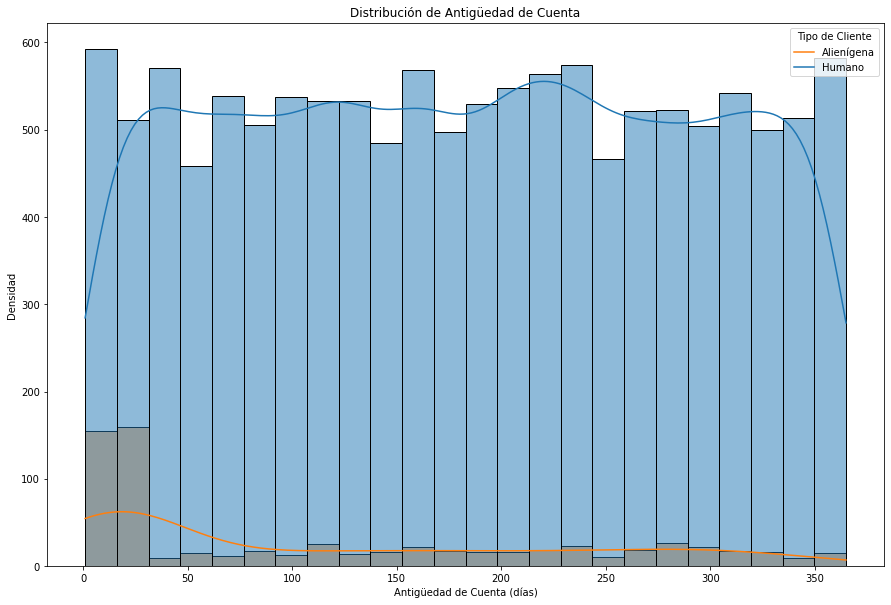

In [25]:
# Distribución según la antiguedad de la cuenta

plt.figure(figsize=(15, 10))
sns.histplot(df, x="Account Age Days", hue="Is An Alien", kde=True)
plt.title("Distribución de Antigüedad de Cuenta")
plt.xlabel("Antigüedad de Cuenta (días)")
plt.ylabel("Densidad")
plt.legend(title="Tipo de Cliente", labels=["Alienígena", "Humano"])
plt.show()
plt.close()

# Se observan valores más contantes en los Humanos que en los Aliens. En el caso de los Aliens,
# se concentra una mayor cantidad de cuentas nuevas, con menos de 30 días de antigüedad.

**4. Análisis de Patrones en Transacciones**

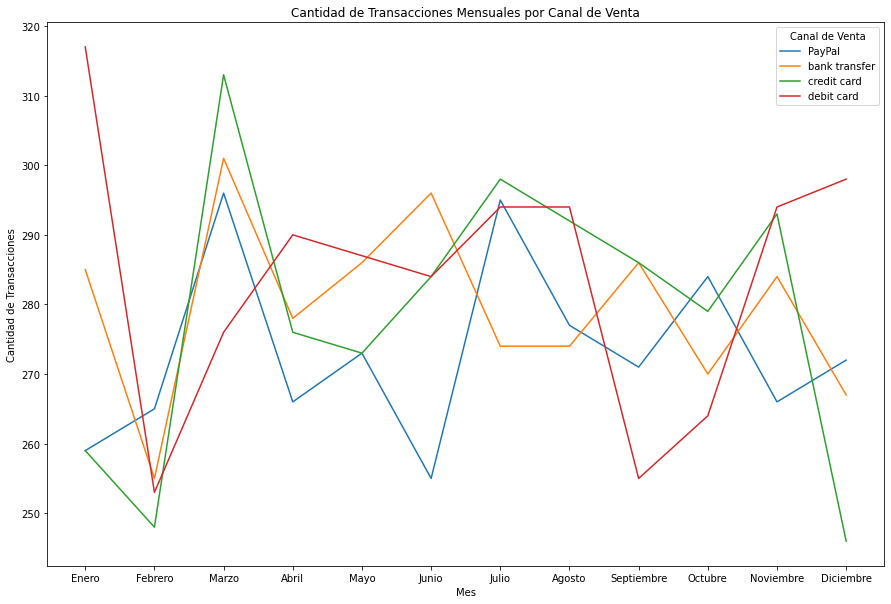

In [26]:
# Cantidad de transacciones mensuales por canal de venta

df_4a = df.groupby(["Transaction Month", "Payment Method"]).size().reset_index(name="Cantidad de Transacciones")

plt.figure(figsize=(15, 10))
sns.lineplot(data=df_4a, x="Transaction Month", y="Cantidad de Transacciones", hue="Payment Method")
plt.title("Cantidad de Transacciones Mensuales por Canal de Venta")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="Canal de Venta")
plt.xticks(range(1, 13), labels=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])
plt.show()
plt.close()

# Se tiene que todos los canales de ventas presentan comportamientos similares, teniendo una
# baja significativa en el mes de Febrero y una recuperación en Marzo. Además, cabe destacar
# que en las tarjetas de crédito hay una baja importante en el mes de Diciembre, mientras que
# en las tarjetas de débito ocurre una baja sustancial en el mes de Septiembre.

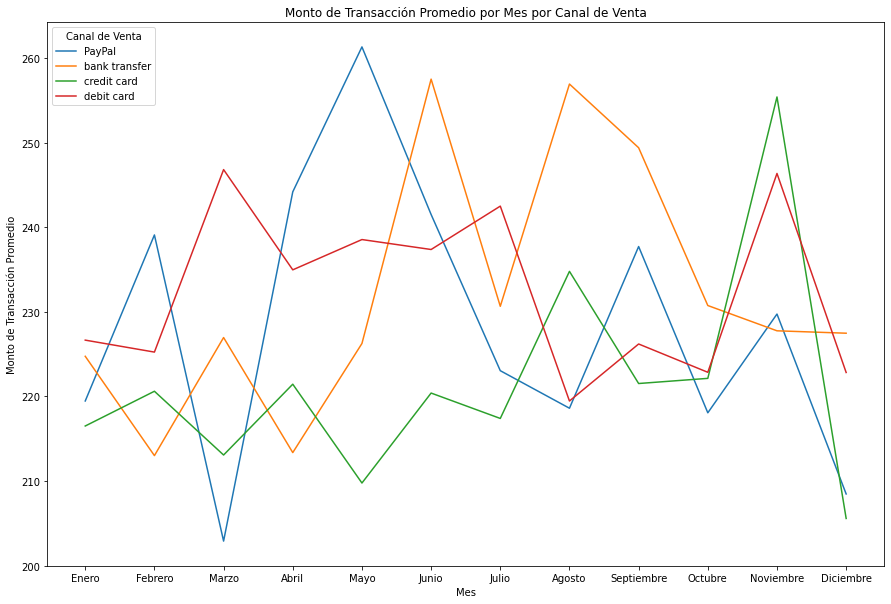

In [27]:
# Monto promedio de transacción por mes y canal de venta
df_4b = df.groupby(["Transaction Month", "Payment Method"])["Transaction Amount"].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_4b, x="Transaction Month", y="Transaction Amount", hue="Payment Method")
plt.title("Monto de Transacción Promedio por Mes por Canal de Venta")
plt.xlabel("Mes")
plt.ylabel("Monto de Transacción Promedio")
plt.legend(title="Canal de Venta")
plt.xticks(range(1, 13), labels=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])
plt.show()
plt.close()

# Este gráfico es particular comparándolo con el gráfico anterior. Por ejemplo, se observa que en
# el anterior, las ventas por Paypal aumentan en Marzo y Julio, mientras que los montos promedios
# de venta disminuyen considerablemente. Por otro lado, se tiene que el monto promedio máximo de
# monto de transacción es alcanzado en PayPal durante el mes de Mayo; mientras que la mínima se
# tiene también por PayPal en Marzo.

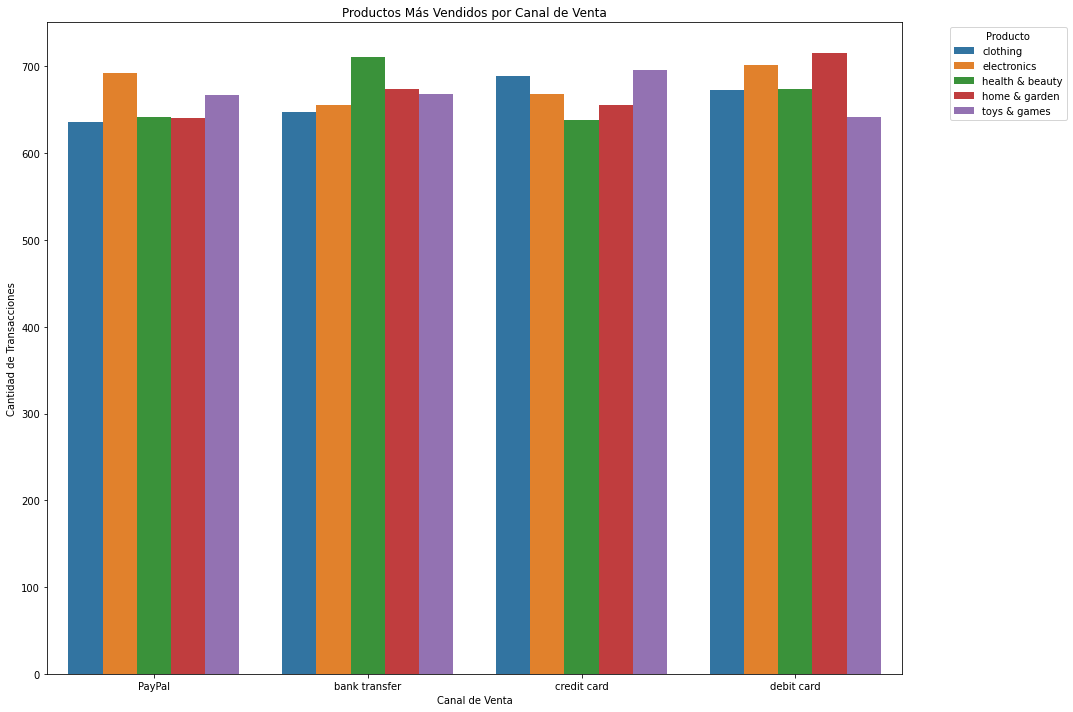

In [28]:
# Cantidad de productos vendidos por canal

df_4c = df.groupby(["Payment Method", "Product Category"]).size().reset_index(name="Cantidad de Transacciones")
df_4b = df_4c.sort_values(by=["Payment Method", "Cantidad de Transacciones"], ascending=[True, False])
df_4c = df_4c.groupby("Payment Method").head(5)

plt.figure(figsize=(15, 10))
sns.barplot(data=df_4c, x="Payment Method", y="Cantidad de Transacciones", hue="Product Category")
plt.title("Productos Más Vendidos por Canal de Venta")
plt.xlabel("Canal de Venta")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()

# Se observa que el tipo de producto más vendido varía según el canal de venta, teniendo que 
# por Paypal se venden más productos de tipo electronics; por transferencia bancaria se venden 
# más de health & beauty; con tarjeta de crédito se vende más toys & games; y con tarjeta de 
# débito home & garden.

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



**1. Creación de Tabla con PySpark**

In [29]:
df['Payment Method'].value_counts()

Payment Method
debit card       3406
bank transfer    3356
credit card      3347
PayPal           3279
Name: count, dtype: int64

**Respuesta**

Se utiliza como variable de partición Payment Method, debido a que está balanceada en las distintas categorías, haciendo que el rendimiento en cuanto a consultas sea el más óptimo en cada una de ellas.

In [30]:
def from_df_to_sql_spark(df_pandas, name_sql_spark):
    df_spark = sparksession.createDataFrame(df)
    return df_spark.write.partitionBy("Payment Method").saveAsTable(name=f"{name_sql_spark}")

In [32]:
from_df_to_sql_spark(df, 'df_sql')

24/04/20 01:45:05 WARN TaskSetManager: Stage 43 contains a task of very large size (4215 KiB). The maximum recommended task size is 1000 KiB.


**2. Consulta SQL para Principales Clientes**

In [33]:
sparksession.sql(
'''
SELECT `Customer ID`, SUM(Quantity) as Total_Quantity
FROM df_sql
GROUP BY `Customer ID`
ORDER BY Total_Quantity DESC
LIMIT 10;
'''
).show()

+--------------------+--------------+
|         Customer ID|Total_Quantity|
+--------------------+--------------+
|1718476e-0518-41b...|             5|
|aa8c72f5-fbcc-4bf...|             5|
|6def79d9-fb71-415...|             5|
|447b6447-464c-400...|             5|
|a76f00f5-8493-41b...|             5|
|ebf10b43-2999-4fa...|             5|
|2f3d5b31-bd85-4d7...|             5|
|62b1ce0c-5495-43e...|             5|
|e91ebafd-1925-400...|             5|
|ddfbe502-d51c-4ac...|             5|
+--------------------+--------------+



**3. Implementación de Función de Ventana en SQL y Equivalente en Spark**

In [34]:
sparksession.sql(
'''
WITH RankedTransactions AS (
    SELECT
        *,
        ROW_NUMBER() OVER (PARTITION BY `Customer ID` ORDER BY `Transaction Date` DESC) AS rn
    FROM
        df_sql
    WHERE
        `Transaction Date` >= DATEADD(MONTH, -3, CURRENT_DATE)
)
SELECT
    `Customer ID`,
    MAX(`Transaction Amount`) AS Max_Purchase_Amount
FROM
    RankedTransactions
WHERE
    rn = 1
GROUP BY
    `Customer ID`;
'''
).show()

+--------------------+-------------------+
|         Customer ID|Max_Purchase_Amount|
+--------------------+-------------------+
|0010bfa7-d3b5-442...|             130.74|
|004d6df5-5d37-4cd...|              32.36|
|0061c7c7-ffd9-40d...|             255.97|
|0084aeb6-6bc7-4f8...|             265.09|
|00dba4f3-102b-4d8...|              80.76|
|00dcef31-265c-4d3...|              82.57|
|011ba8d6-6dcd-4cf...|             218.64|
|014817a0-2f4f-477...|             289.72|
|014da57c-a59c-465...|              33.22|
|015a8996-8ac2-488...|             451.94|
|01754c8a-c873-49e...|             267.89|
|0178fe5b-e055-4ec...|             723.04|
|01ac1427-4acc-410...|             234.43|
|01feca2f-2907-445...|              48.71|
|0270d1d5-c8b8-4be...|               56.2|
|03557036-602b-4f5...|               29.8|
|03a5dccc-c7cc-4aa...|              58.84|
|03c61a84-77db-4aa...|             269.66|
|03d7aba5-8f52-40f...|              93.03|
|03f31ca3-a6ec-424...|              22.09|
+----------

Se podría hacer una función equivalente a través de DataFrames de PySpark. Para esto, se pueden particionar los datos por cliente y ordenar según las fecha de transacción. Luego se agrega con un row_number(), equivalente a la función ventana de SQL, y se filtra considerando solo las transacciones de los últimos 3 meses de manera ordenada descendiente, y las filas numeradas, considerando solo la primera (la más alta). Finalmente, se seleccionan los Customers ID y el Transaction Amount, como se muestra a continuación,

In [35]:
from pyspark.sql.functions import expr, date_add, current_date, col, max as pyspark_max, row_number
from pyspark.sql.window import Window

df_spark = sparksession.createDataFrame(df)

window_spec = Window.partitionBy("Customer ID").orderBy(col("Transaction Date").desc())

# Filtrar las transacciones dentro de los últimos 3 meses
three_months_ago = date_add(current_date(), -3)
df_spark = df_spark.filter(col("Transaction Date") >= three_months_ago)

# Agregar una columna de numeración de fila dentro de cada partición de cliente
df_spark = df_spark.withColumn("rn", row_number().over(window_spec))

# Filtrar para obtener solo la primera transacción de cada cliente
first_transaction_by_customer = df_spark.filter(col("rn") == 1)

# Agrupar por cliente y calcular la transacción máxima
max_transaction_by_customer = first_transaction_by_customer.groupBy("Customer ID") \
    .agg(pyspark_max("Transaction Amount").alias("Max_Purchase_Amount"))

# Mostrar el resultado
max_transaction_by_customer.show()

+--------------------+-------------------+
|         Customer ID|Max_Purchase_Amount|
+--------------------+-------------------+
|0010bfa7-d3b5-442...|             130.74|
|0084aeb6-6bc7-4f8...|             265.09|
|00dba4f3-102b-4d8...|              80.76|
|011ba8d6-6dcd-4cf...|             218.64|
|014817a0-2f4f-477...|             289.72|
|014da57c-a59c-465...|              33.22|
|01754c8a-c873-49e...|             267.89|
|0178fe5b-e055-4ec...|             723.04|
|01ac1427-4acc-410...|             234.43|
|01feca2f-2907-445...|              48.71|
|03557036-602b-4f5...|               29.8|
|03a5dccc-c7cc-4aa...|              58.84|
|03c61a84-77db-4aa...|             269.66|
|045f786a-6d18-471...|             195.54|
|0464bbaa-d5e0-41c...|             425.34|
|0480cf5d-85b6-481...|             264.29|
|04c9816c-3a7a-41a...|             707.63|
|04d42160-5adb-4ff...|             174.46|
|04f5a6ca-11b7-440...|             189.93|
|04fa4322-5441-419...|             392.13|
+----------

24/04/20 01:45:18 WARN TaskSetManager: Stage 50 contains a task of very large size (4215 KiB). The maximum recommended task size is 1000 KiB.


### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

In [ ]:
# Código Aquí